In [1]:
import sys
sys.path.append('/Users/pradithaalwis/Projects/University of Peradeniya/LBCAM')
from utils.dataloader import dtLoader
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [2]:
source = "/Users/pradithaalwis/Projects/University of Peradeniya/Fetal Mov Data/Ward/"
drop_zero_path = "/Users/pradithaalwis/Projects/University of Peradeniya/Fetal Mov Data//Randomly_Dropped_Windows/"
sensors = ['ax1', 'ay1', 'az1', 'ax2', 'ay2', 'az2', 'ax3', 'ay3', 'az3', 'ax4', 'ay4', 'az4']
sample_freq = 32

# Stride in seconds
stride = 1

# Window length in seconds
window_length = 8

# Safety margin in seconds
front_margin = 2
rear_margin = 2

In [3]:
"""
Splits the signals into windows
Args:
    SOURCE          : path to the sensor data
    SAMPLE_FREQ     : sample frequency of sensors
    STRIDE          : stride used for windowing (in seconds)
    WINDOW_LENGTH   : length of the required window in seconds
    FRONT_MARGIN    : Required offset before a fetal kick (in seconds)
    REAR_MARGIN     : Required offset after a fetal kick (in seconds)
"""
dataloader = dtLoader(SOURCE=source,
                        SAMPLE_FREQ=sample_freq,
                        STRIDE=stride,
                        WINDOW_LENGTH=window_length,
                        FRONT_MARGIN=front_margin,
                        REAR_MARGIN=rear_margin,
                        SENSORS=sensors)

In [4]:
"""
Args:
Returns:
    self.window_list            : Set of generated windows
    self.kick_count_list        : Number of kicks in each window
    counts                      : Dictionary containing number of windows                             with the given number of kicks
"""
counts = dataloader.split_windows()

--------------------------------------------------------------------------------
These are the list of files in the source directory.
['W17_R1.csv', 'W09_R1.csv', 'W05_R1.csv', 'W21_R1.csv', 'W05_R2.csv', 'W21_R2.csv', 'W15_R2.csv', 'W19_R1.csv', 'W07_R1.csv', 'W15_R1.csv', 'W23_R1.csv', 'W11_R3.csv', 'W27_R2.csv', 'W11_R2.csv', 'W27_R1.csv', 'W11_R1.csv', 'W03_R1.csv', 'W25_R1.csv', 'W11_R5.csv', 'W29_R1.csv', 'W01_R1.csv', 'W11_R4.csv', 'W13_R1.csv', 'W25_R2.csv', 'W29_R2.csv', 'W29_R3.csv', 'W25_R3.csv', 'W04_R2.csv', 'W20_R1.csv', 'W08_R1.csv', 'W16_R1.csv', 'W04_R1.csv', 'W22_R1.csv', 'W30_R1.csv', 'W06_R1.csv', 'W18_R1.csv', 'W14_R1.csv', 'W22_R2.csv', 'W10_R1.csv', 'W02_R1.csv', 'W26_R1.csv', 'W24_R3.csv', 'W24_R2.csv', 'W12_R1.csv', 'W24_R1.csv', 'W28_R1.csv']
--------------------------------------------------------------------------------
Length of dataframe :  1286  seconds
W17_R1.csv has been processed
Length of dataframe :  1263  seconds
W09_R1.csv has been processed
Length

In [8]:
window_list, num_kick_list = dataloader.drop_zero_kicks(counts[0] - counts[1], drop_zero_path)

In [9]:
values = np.geomspace(1, 32, num=64)
widths = []
sample_freq = 32
frequencies = pywt.scale2frequency('cmor2.5-0.5', values) * sample_freq

for i in range(len(values)):
    if frequencies[i] > 2:
        widths.append(values[i])

print(widths)

[1.0, 1.0565529561951361, 1.1163041492446812, 1.1794344488973643, 1.2461349536208914, 1.3166075690662418, 1.3910656192458295, 1.4697344922755988, 1.5528523226357414, 1.640670712015276, 1.7334554909225186, 1.831487523366878, 1.9350635570477834, 2.044497121624311, 2.160119477784612, 2.282280619988026, 2.4113503359152166, 2.547719325833357, 2.6918003852647123, 2.844029654538638, 3.0048679390094297, 3.174802103936399, 3.3543465482485404, 3.544044761654946, 3.74447096981442, 3.956231872544294, 4.179968480330093, 4.416358054695249, 4.666116158304466, 4.929998821006476, 5.208804828372927, 5.503378139660915, 5.814610442518429, 6.143443852165955, 6.490873763224775, 6.857951862824584, 7.245789314111255, 7.6555601197913745]


In [10]:
frequencies = pywt.scale2frequency('cmor2.5-0.5', widths) * sample_freq
print(frequencies)

[16.         15.14358547 14.33301131 13.56582387 12.83970083 12.15244419
 11.50197358 10.88632    10.30361984  9.75210923  9.23011873  8.73606825
  8.26846226  7.82588531  7.4069977   7.01053142  6.63528636  6.28012664
  5.94397716  5.62582038  5.32469324  5.0396842   4.76993053  4.51461567
  4.27296676  4.04425234  3.82778006  3.62289466  3.42897593  3.24543688
  3.07172193  2.90730522  2.75168907  2.60440241  2.46499941  2.33305808
  2.20817903  2.08998424]


In [11]:
C = 0.5
B = 2.5
cwtmatr, freqs = pywt.cwt(window_list[0][2], widths, 'cmor' + str(B) + '+' +str(C), sampling_period=32, method='fft')
cwtmatr = np.abs(cwtmatr[:-1, :-1])

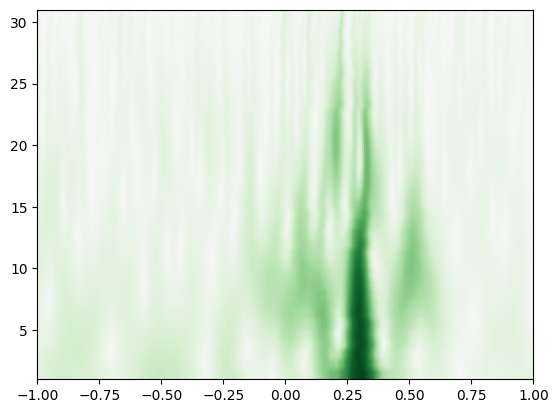

In [12]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [13]:
def gen_scalo(signal):
    values = np.geomspace(1, 32, num=64)
    widths = []
    sample_freq = 32
    frequencies = pywt.scale2frequency('cmor2.5-0.5', values) * sample_freq

    for i in range(len(values)):
        if frequencies[i] > 2:
            widths.append(values[i])
    C = 0.5
    B = 2.5
    cwtmatr, freqs = pywt.cwt(window_list[0][2], widths, 'cmor' + str(B) + '+' + str(C), sampling_period= 1 / sample_freq, method='fft')
    cwtmatr = np.abs(cwtmatr[:-1, :-1]) ** 2
    return cwtmatr, freqs

In [17]:
# Should randomize this selection
scalograms = []
for i in range(len(num_kick_list)):
    if num_kick_list[i] == 1:
        for sensor in window_list[i]:
            cwtmatr, freq = gen_scalo(sensor)
            scalograms.append(cwtmatr)
        break

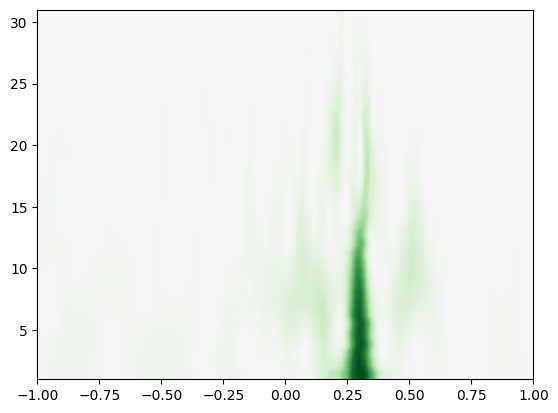

In [18]:
plt.imshow(scalograms[0], extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

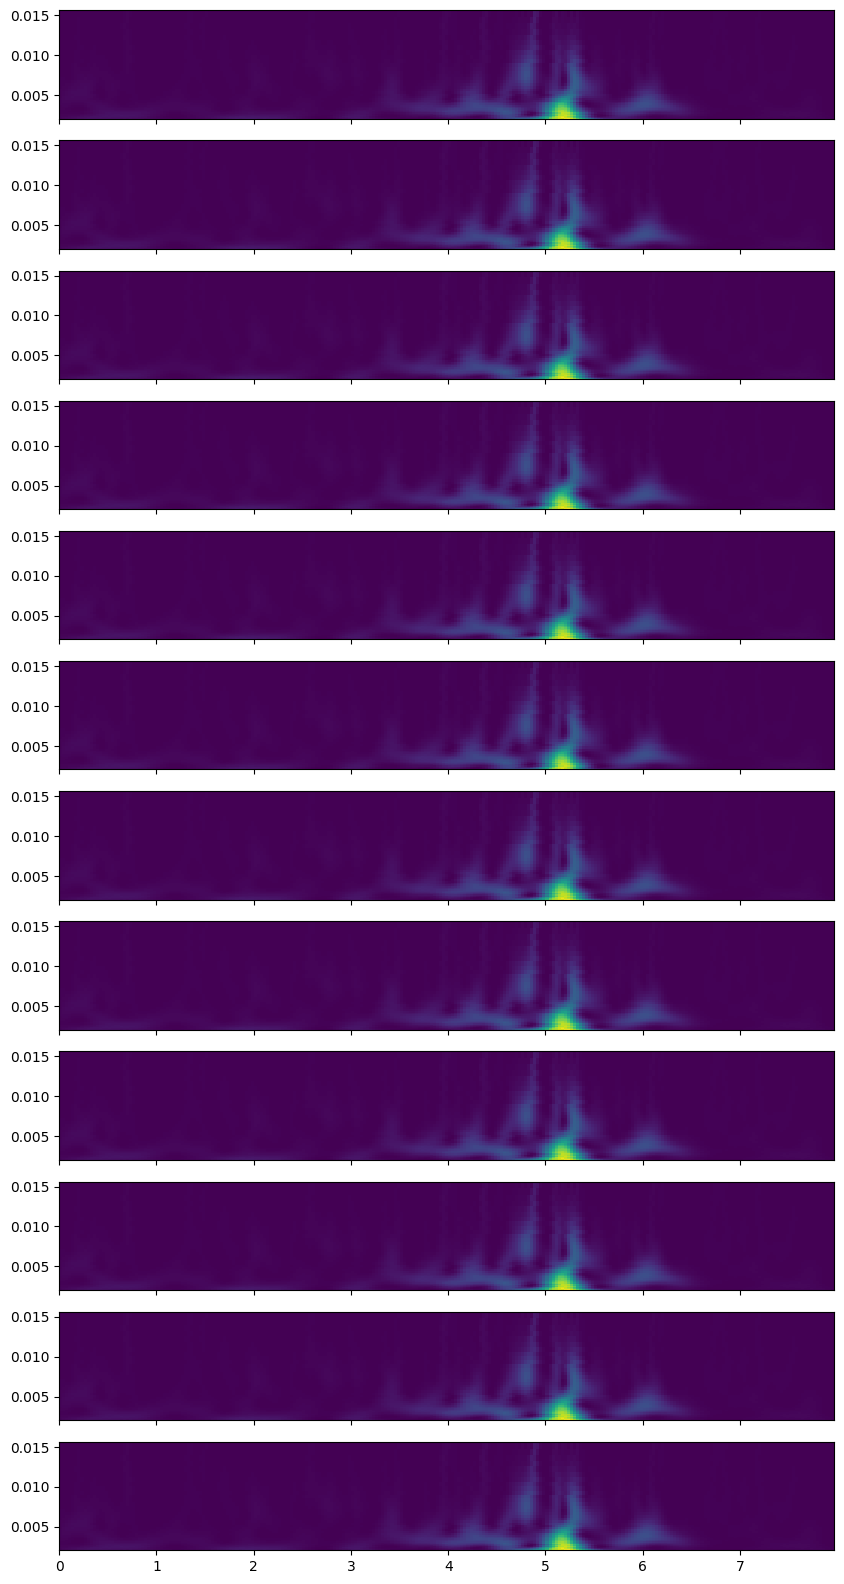

In [19]:
time = np.linspace(0, 8 - (1/sample_freq), sample_freq * 8)
fig, axs = plt.subplots(len(scalograms), 1, figsize=(10, 20), sharex=True)
for ax, scalogram in zip(axs.flatten(), scalograms):
    ax.pcolormesh(time, freqs, scalogram)

In [226]:
def make_chirp(t, t0, a):
    # frequency = (a * (t + t0)) ** 2
    frequency = t*10 + 10
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency

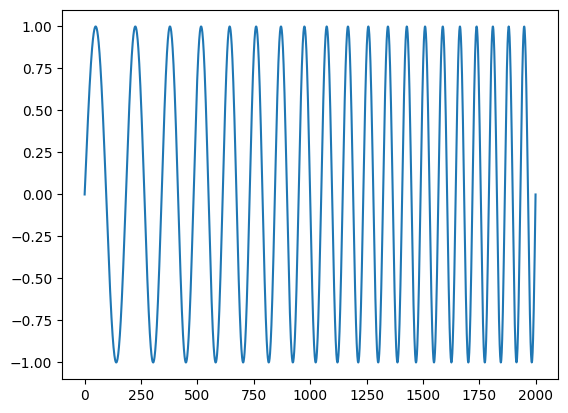

In [227]:
time = np.linspace(0, 1, 2000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
plt.plot(chirp1)
sampling_period = np.diff(time).mean()

In [237]:
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(chirp1, widths, 'cmor', sampling_period=sampling_period, method='fft')
cwtmatr = np.abs(cwtmatr[:-1, :-1])

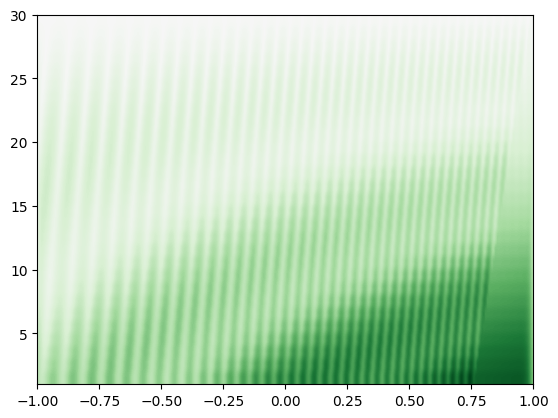

In [238]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, len(widths)], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [239]:
# Since breathing patterns are observed in the low scales, we can drop them. Or else we can increase the center frequency. Slightly higher bandwidth will help to capture fetal movements.

In [246]:
# widths = np.arange(1, 31)
values = np.geomspace(1, 32, num=32)
# dt = np.diff(time).mean()
dt = 1 / 32
frequencies = pywt.scale2frequency('cmor2.5-1.0', values) / dt
cwtmatr, freqs = pywt.cwt(chirp1, widths, 'cmor2.5-1.0', sampling_period=sampling_period, method='fft')
cwtmatr = np.abs(cwtmatr[:-1, :-1])

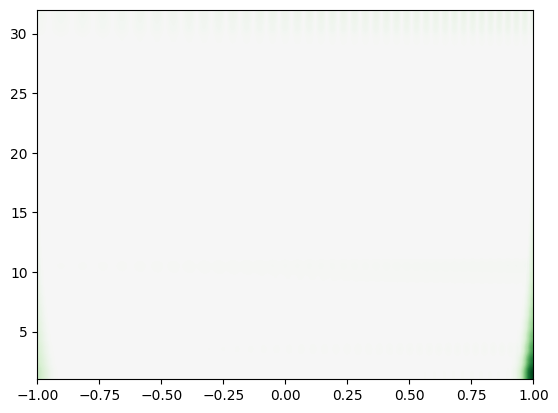

In [247]:
plt.imshow(cwtmatr, extent=[-1, 1, 1, len(widths)], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [256]:
# widths = np.geomspace(1, 16, num=32)
frequencies = pywt.scale2frequency('cmor2.5-0.5', widths) / dt

In [257]:
print(frequencies)

[16.         14.30759893 12.7942117  11.4409031  10.23074081  9.14858352
  8.18089148  7.31555714  6.5417536   5.84979917  5.23103627  4.67772306
  4.18293659  3.7404862   3.34483602  2.99103576  2.67465876  2.39174655
  2.1387594   1.91253198  1.71023378  1.52933369  1.36756832  1.22291369
  1.09355991  0.97788854  0.87445231  0.78195706  0.6992455   0.62528276
  0.55914343  0.5       ]


In [254]:
print(widths)

[1.0, 1.1182868682116351, 1.2505655196145868, 1.3984909984232523, 1.5639141188489016, 1.748904622119497, 1.9557770726708654, 2.1871198175172215, 2.4458273711349365, 2.7351366310527845, 3.058667377270941, 3.420467562229416, 3.8250639579850194, 4.277518794284269, 4.7834930961765645, 5.349317513635269, 5.982071529392835, 6.689672036022698, 7.480972390526777, 8.365873185779897, 9.355446124781498, 10.462072547604578, 11.699598344263643, 13.08350719174062, 14.631114282676021, 16.361782969620297, 18.297167035455146, 20.4614816212243, 22.881806201168853, 25.588423395730686, 28.61519786168501, 32.0]


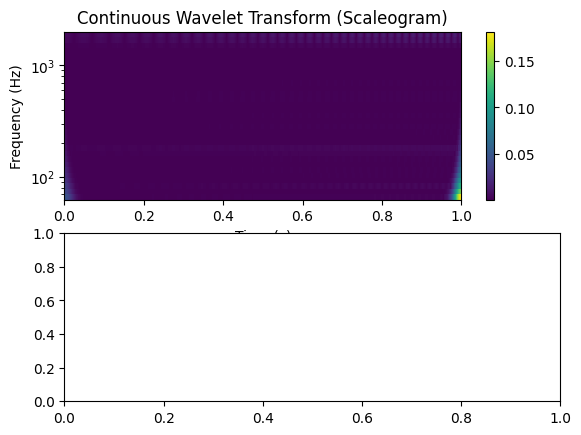

In [255]:
fig, axs = plt.subplots(2, 1)
pcm = axs[0].pcolormesh(time, freqs, cwtmatr)
axs[0].set_yscale("log")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs[0])

In [225]:
array = [1, 2, 3, 4]